In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import csv
import networkx as nx
import scipy.stats as stats
import math
#from kneed import KneeLocator
#from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [363]:
globalNumber = 500
clusterNumber = 5

# input cost vector to be visualzed
with open("global_cost_vectors_500_lRand.pk",'rb') as f:
    global_cost = pickle.load(f)
with open("global_trips_500_lRand.pk",'rb') as f:
    global_dict = pickle.load(f)
# with open("global_trips.pk",'rb') as f:
#     global_dict = pickle.load(f)
with open("local_cost_vectors.pk",'rb') as f:
    local_cost = pickle.load(f)

In [364]:
len(global_cost.keys())

500

# Visualize with original data (2 factors : time and risk)

In [383]:
global_cost_list = []
time_list = []
risk_list = []

for k in global_cost:
    time_list.append(global_cost[k][0][0])
    risk_list.append(global_cost[k][0][1])
    
avgTime = np.mean(time_list)
stdTime = np.std(time_list)
avgRisk = np.mean(risk_list)
stdRisk = np.std(risk_list)
# normalized point
global_time_normalized = []
global_risk_normalized = []
for k in global_cost:
    temp = ((global_cost[k][0][0]-avgTime)/stdTime, (global_cost[k][0][1]-avgRisk)/stdRisk)
    global_time_normalized.append((global_cost[k][0][0]-avgTime)/stdTime)
    global_risk_normalized.append((global_cost[k][0][1]-avgRisk)/stdRisk)
    global_cost_list.append(temp)
    


In [385]:
len(global_cost_list)

500

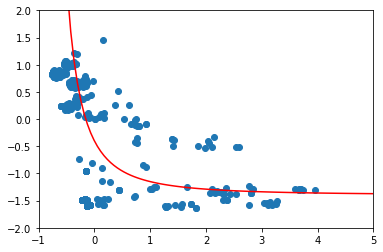

In [367]:
plt.scatter(global_time_normalized, global_risk_normalized)

# 100 linearly spaced numbers
x = np.linspace(-0.9,5,100)
# the function, which is y = x^2 here
y = 1/(x+1)**2 -1.4
#y = 1/(x+1.2)**2 -1.6
plt.ylim([-2, 2])
plt.xlim([-1, 5])
plt.plot(x,y, 'r')
plt.show()

In [386]:
def func(x,y):
    return 1/(x+1)**2 -1.4 -y
greenX = []
greenY = []
global_cost_list = []
greenLoop = [] # stores the loop number

blueX = []
blueY =[]
for i in range(len(global_time_normalized)):
    #if True:
    if func(global_time_normalized[i],global_risk_normalized[i]) >= 0:
        greenX.append(global_time_normalized[i])
        greenY.append(global_risk_normalized[i])
        global_cost_list.append((global_time_normalized[i],global_risk_normalized[i]))
        greenLoop.append(i+1)
    else:
        blueX.append(global_time_normalized[i])
        blueY.append(global_risk_normalized[i])
        

In [387]:
len(greenX)

408

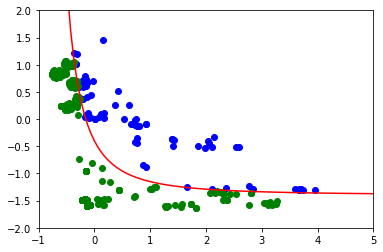

In [388]:
plt.scatter(blueX, blueY,c ='b')
plt.scatter(greenX, greenY,c ='g')

# 100 linearly spaced numbers
x = np.linspace(-0.9,5,100)
# the function, which is y = x^2 here
y = 1/(x+1)**2 -1.4
plt.ylim([-2, 2])
plt.xlim([-1, 5])
plt.plot(x,y, 'r')
plt.show()

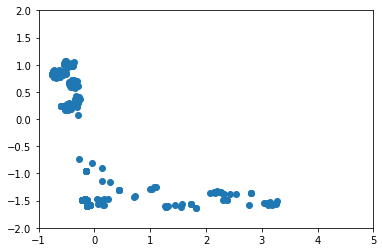

In [389]:
#plt.scatter(blueX, blueY,c ='b')
plt.scatter(greenX, greenY)


plt.ylim([-2, 2])
plt.xlim([-1, 5])
#plt.plot(x,y, 'r')
plt.show()

In [390]:
greenLoop

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 40,
 43,
 44,
 45,
 50,
 57,
 59,
 60,
 65,
 67,
 69,
 71,
 72,
 74,
 78,
 89,
 90,
 92,
 94,
 95,
 96,
 97,
 99,
 100,
 101,
 102,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 171,
 172,
 174,
 175,
 176,
 177,
 178,
 181,
 182,
 183,
 184,
 185,
 186,
 188,
 189,
 190,
 191,
 192,
 195,
 196,
 197,
 198,
 200,
 201,
 202,
 203,
 204,
 205,
 207,
 208,
 209,
 210,
 212,
 213,
 214,
 215,
 216,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 23

In [373]:
local_cost_list = []
time_list = []
risk_list = []

for k in local_cost:
    time_list.append(local_cost[k][0][0])
    risk_list.append(local_cost[k][0][1])
    
avgTime = np.mean(time_list)
stdTime = np.std(time_list)
avgRisk = np.mean(risk_list)
stdRisk = np.std(risk_list)
# normalized point
local_time_normalized = []
local_risk_normalized = []
for k in local_cost:
    temp = ((global_cost[k][0][0]-avgTime)/stdTime, (global_cost[k][0][1]-avgRisk)/stdRisk)
    local_time_normalized.append((local_cost[k][0][0]-avgTime)/stdTime)
    local_risk_normalized.append((local_cost[k][0][1]-avgRisk)/stdRisk)
    local_cost_list.append(temp)

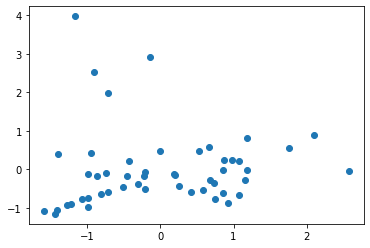

In [374]:
plt.scatter(local_time_normalized, local_risk_normalized)
plt.show()

# Visualize with ratio data (2 factors : time and risk)

In [391]:
global_ratio_list = []
ratio_list = []

for k in global_cost:
    ratio_list.append((global_cost[k][0][0]/global_cost[k][0][1]))
    
avgRatio = np.mean(ratio_list)
stdRatio = np.std(ratio_list)

# normalized point
global_Ratio_normalized = []
for e in ratio_list:
    global_ratio_list.append((e-avgRatio)/stdRatio)
    

(array([  0.,   0.,   0.,   0.,   0., 314.,  24.,  21.,   2.,   0.,   9.,
          3.,  70.,  13.,   0.,  20.,   3.,   4.,   3.,   7.,   2.,   3.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.]),
 array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
         0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
         2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ,
         4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,  6.75,
         7.  ]),
 <BarContainer object of 36 artists>)

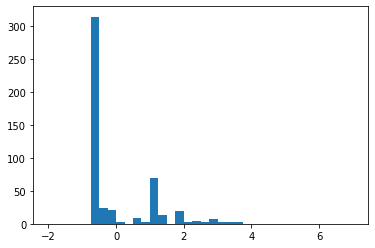

In [393]:
bins = [-2]
for i in range(36):
    bins.append(bins[-1]+0.25)
    
#temp = [global_ratio_list[i] for i in range(500) if kmeans.labels_[i]==0]
    
plt.hist(global_ratio_list,bins=bins)

In [394]:
local_ratio_list = []
ratio_list = []

for k in local_cost:
    ratio_list.append((local_cost[k][0][0]/local_cost[k][0][1]))
    
avgRatio = np.mean(ratio_list)
stdRatio = np.std(ratio_list)

# normalized point
local_Ratio_normalized = []
for e in ratio_list:
    local_ratio_list.append((e-avgRatio)/stdRatio)

(array([ 2.,  4.,  3.,  9., 11.,  3.,  3.,  2.,  1.,  2.,  2.,  1.,  0.,
         1.]),
 array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25]),
 <BarContainer object of 14 artists>)

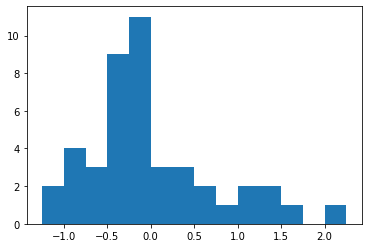

In [395]:
bins = [-1.25]
for i in range(14):
    bins.append(bins[-1]+0.25)
    
plt.hist(local_ratio_list,bins=bins)

# K means clustering based on the original features

In [430]:
from sklearn.metrics import silhouette_score

points = global_cost_list
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(
            init="random",
            n_clusters=k,
            n_init=10,
            max_iter=300,
            random_state=43
        )

    kmeans.fit(points)
    labels = kmeans.labels_
    sil.append(silhouette_score(points, labels, metric = 'euclidean'))

In [431]:
global_cost_list == [(1.5449238059570898, -1.6211331111850908), (1.816588170434712, -1.6308102118395624), (1.816588170434712, -1.6308102118395624), (1.2721350372048434, -1.606752123968113), (1.2883327099220208, -1.6091106960209312), (1.2883327099220208, -1.6091106960209312), (1.2883327099220208, -1.6091106960209312), (1.3185880629168156, -1.6022267480279566), (3.1813351841128434, -1.5750839015424831), (2.7702628484364076, -1.5753872140574512), (3.2605609021593227, -1.5609753559571287), (3.1098913492266536, -1.5767929044468458), (3.0997039828856146, -1.5484927804378366), (3.1492939556547186, -1.532897568040544), (3.039515130418104, -1.550849484401759), (3.272847358338271, -1.5091518824950068), (1.5675903368853168, -1.5664517175402077), (1.4430992884027527, -1.5815033336778586), (1.7298641662135361, -1.5578500004007487), (1.7298641662135361, -1.5578500004007487), (2.307018666494988, -1.4973327178815108), (2.3835661430068007, -1.4922191753891023), (2.3835661430068007, -1.4922191753891023), (1.7298641662135361, -1.5578500004007487), (2.227283827045405, -1.3380407308889488), (2.3289930720404297, -1.38575652474995), (2.150736350533592, -1.3431542733813575), (2.309217838108201, -1.371068744616512), (0.24054021331863032, -1.479312509624817), (1.0746147260968943, -1.2438400906632756), (1.1048843628963374, -1.2528092196576717), (2.5335981253662276, -1.386053027064366), (2.424868297482859, -1.3796225534313311), (2.245014056772232, -1.3403702351649287), (2.263318569185403, -1.347923519881121), (2.2058759065631164, -1.3317366842233351), (2.1640826704208243, -1.364120961648894), (2.0792021907722678, -1.358862441918131), (2.798295653868399, -1.359689358360188), (2.798295653868399, -1.359689358360188), (2.798295653868399, -1.359689358360188), (0.0783665553863457, -1.4794548445959488), (0.7291064464180056, -1.4241219237605474), (-0.13064728944907952, -1.590088070233273), (0.153061551054274, -1.5797546191946268), (0.7061185113038957, -1.4250244793861304), (0.17604948616838384, -1.578852063569044), (-0.2826458482716498, 0.4073255330825285), (-0.4728830135573348, 0.17564283947300344), (-0.31204386318242616, 0.36678309229231304), (1.0359937936746906, -1.2894840360726783), (0.4408388451603691, -1.3043401730556512), (0.4408388451603691, -1.3043401730556512), (0.4408388451603691, -1.3043401730556512), (0.9954753830749625, -1.2888734159712918), (0.4408388451603691, -1.3043401730556512), (-0.07192980128422938, -1.5732800083641139), (-0.15350182800588735, -0.960322605650388), (-0.15350182800588735, -0.960322605650388), (-0.07192980128422938, -1.5732800083641139), (-0.15350182800588735, -0.960322605650388), (-0.22833022023111915, -1.4906908512601778), (-0.16456074767245987, -1.4864309079869744), (-0.16456074767245987, -1.4864309079869744), (-0.22833022023111915, -1.4906908512601778), (-0.22833022023111915, -1.4906908512601778), (-0.169612732066269, -1.4738827893910185), (-0.13064728944907952, -1.590088070233273), (-0.22833022023111915, -1.4906908512601778), (-0.169612732066269, -1.4738827893910185), (-0.22833022023111915, -1.4906908512601778), (-0.13064728944907952, -1.590088070233273), (-0.22833022023111915, -1.4906908512601778), (0.0783665553863457, -1.4794548445959488), (-0.16456074767245987, -1.4864309079869744), (-0.22833022023111915, -1.4906908512601778), (-0.1398094970167582, -1.479403944767348), (-0.07192980128422938, -1.5732800083641139), (-0.22833022023111915, -1.4906908512601778), (-0.13064728944907952, -1.590088070233273), (-0.07192980128422938, -1.5732800083641139), (-0.169612732066269, -1.4738827893910185), (-0.15350182800588735, -0.960322605650388), (-0.4476146183672487, 0.221462515664658), (-0.4758801306163458, 0.17943173187088374), (-0.6065905099625349, 0.2369587055911145), (-0.22833022023111915, -1.4906908512601778), (-0.4823732061214046, 0.2628351100887482), (-0.169612732066269, -1.4738827893910185), (-0.13064728944907952, -1.590088070233273), (-0.4624958157944536, 0.2629332106301493), (0.06337243913271288, -1.5691897073957535), (-0.22833022023111915, -1.4906908512601778), (-0.4542536880649225, 0.2749900408573174), (-0.39903641440196014, 0.2840819579624039), (-0.13064728944907952, -1.590088070233273), (-0.435653487359618, 0.18401938511899177), (-0.34463294677627454, 0.3651320710761378), (-0.29472462984544767, 0.2997514667125088), (-0.4952445768181812, 0.277754437867097), (-0.5306100552234361, 0.16718695504453635), (-0.22833022023111915, -1.4906908512601778), (-0.2738234360370542, 0.3549588051672181), (0.05478093008593765, -1.4646034908087637), (-0.4606834431130633, 0.3003607422422329), (-0.44825238999489525, 0.21151811078304542), (-0.22833022023111915, -1.4906908512601778), (-0.22833022023111915, -1.4906908512601778), (-0.22833022023111915, -1.4906908512601778), (-0.15350182800588735, -0.960322605650388), (-0.22833022023111915, -1.4906908512601778), (-0.12402377468501, -1.4809406334355562), (-0.7182707410384263, 0.7801217605691467), (-0.22833022023111915, -1.4906908512601778), (-0.169612732066269, -1.4738827893910185), (-0.15350182800588735, -0.960322605650388), (-0.13064728944907952, -1.590088070233273), (0.0783665553863457, -1.4794548445959488), (-0.15350182800588735, -0.960322605650388), (-0.169612732066269, -1.4738827893910185), (-0.22833022023111915, -1.4906908512601778), (0.2781130569794726, -1.1596211637438791), (0.1338782222520466, -1.1356877128131522), (-0.13064728944907952, -1.590088070233273), (-0.22833022023111915, -1.4906908512601778), (-0.22833022023111915, -1.4906908512601778), (-0.15350182800588735, -0.960322605650388), (-0.7358975555917447, 0.8262674141320512), (-0.22833022023111915, -1.4906908512601778), (-0.520214400960518, 1.0028670455062836), (-0.37386120870171846, 0.24826409037130123), (-0.3953722181684855, 0.24658078601793054), (-0.43732588801158145, 0.9732763731621483), (-0.22833022023111915, -1.4906908512601778), (-0.43177150089733307, 0.24986192991540446), (-0.4555681524722967, 0.25095523990658863), (-0.7074056768375334, 0.7904140054068488), (-0.4747714238564594, 0.20102900269568172), (-0.46004602174054404, 0.25457283632622735), (-0.5240046014571197, 0.24902246856902716), (-0.6164150902917072, 0.7745498741868817), (-0.35166532596971145, 0.58212766951114), (-0.5343827122455157, 0.8816746042135833), (-0.6951341156881982, 0.8767947419325515), (-0.27255019249008106, 0.3625540218274734), (-0.7524890319189292, 0.8221227514236493), (-0.3665627696826688, 0.6343740338620267), (-0.7346034546785091, 0.8141842545597684), (-0.4446927385959781, 0.9859790282975621), (-0.13064728944907952, -1.590088070233273), (-0.4229488609714213, 0.9827716805787078), (-0.6373192762003411, 0.7893585254207057), (-0.22833022023111915, -1.4906908512601778), (-0.47009260959719257, 1.030106943400494), (-0.5154519413505776, 0.822007845311801), (-0.5076055315660158, 0.8501834125952751), (-0.512794450581342, 1.0198404154458585), (-0.7074056768375334, 0.7904140054068488), (-0.7104471002187783, 0.8083860120537922), (-0.7359140472588774, 0.8853093187585104), (-0.22833022023111915, -1.4906908512601778), (-0.047317936802131866, -0.8139398962934009), (-0.4676789947161821, 0.9812706724006737), (-0.5213713073708316, 0.8877730669058546), (-0.7016666617605799, 0.8122243257426331), (-0.6974606473935961, 0.8291698657195914), (-0.6603758932272041, 0.8093793969233297), (-0.6641512020111425, 0.8714333784022381), (-0.22833022023111915, -1.4906908512601778), (-0.416941200494904, 0.6620774344028854), (-0.7192904701479289, 0.8825929844385277), (-0.5071855355447659, 1.0312249479073108), (-0.5310439830800474, 1.0046849028894402), (-0.7126843827075252, 0.7837191558639374), (-0.7384988392677575, 0.8243718496641352), (-0.630553495777119, 0.8287777943212926), (-0.7245627227902189, 0.7982342894737904), (-0.3899833086413476, 0.9855249517206467), (-0.7126492230511884, 0.8194641954956838), (-0.7208388865028168, 0.8366643287631422), (-0.3782132023107283, 0.6256038761507198), (-0.5293985298591876, 0.9877378502723723), (-0.6395547078461795, 0.8457675647814025), (-0.46149691279566857, 1.0196751073754429), (-0.49159883647142993, 0.9886052363507304), (-0.6797813511029082, 0.8411799115332949), (-0.07192980128422938, -1.5732800083641139), (-0.4386071047131885, 0.9870846536087462), (-0.5310760838638114, 1.0115458999178248), (-0.07192980128422938, -1.5732800083641139), (-0.6065905099625349, 0.2369587055911145), (-0.22833022023111915, -1.4906908512601778), (-0.7512270317894576, 0.8169005888797511), (-0.4442270163161146, 0.63908359218551), (-0.42332865817588894, 0.6641736191959049), (-0.32589546897088917, 0.602980875954002), (-0.7256780884669412, 0.7911062930946562), (-0.07192980128422938, -1.5732800083641139), (-0.3973854270529659, 0.6500438791712293), (-0.7200631335835812, 0.7895684590104664), (-0.6185495674464244, 0.8249662345283238), (-0.4859835071293539, 0.9888239571168655), (-0.7074056768375334, 0.7904140054068488), (-0.5189203000472823, 0.9907838859340008), (-0.3897519554455595, 0.6244571910708229), (-0.5683210075546469, 0.24571877633127676), (-0.6924926240079446, 0.7903485486540376), (-0.4176502846323887, 0.5950051424369494), (-0.4986922018179518, 0.9465337968390123), (-0.7326057517890973, 0.8030842638182168), (-0.7258413825217097, 0.8252173960605181), (-0.48861859828850757, 0.9792232734464129), (-0.714342484808026, 0.818573607158159), (-0.5128117154762315, 1.0027831616501266), (-0.370639632328613, 1.0411644452321644), (-0.6961877723676261, 0.8249246194688497), (-0.41711466899796423, 0.5911539154337145), (-0.53554387715823, 0.9935002202539835), (-0.6658452346253688, 0.81504235134295), (0.18067394608954374, -1.4722168465376775), (-0.46146481201190453, 1.0128141103470583), (-0.4854055941277728, 0.9616982135217348), (-0.6961877723676261, 0.8249246194688497), (-0.46149691279566857, 1.0196751073754429), (-0.7025756195217447, 0.8521536721030843), (-0.5590991668520238, 0.8362654651797307), (-0.7074056768375334, 0.7904140054068488), (-0.35278069164643283, 0.5749996731320058), (-0.6016584050623548, 0.8261874587924894), (-0.7346034546785091, 0.8141842545597684), (-0.365470249176244, 0.581015123764008), (-0.6692462826799606, 0.8259482295037764), (-0.7074056768375334, 0.7904140054068488), (-0.5293985298591876, 0.9877378502723723), (-0.32025900492387727, 0.699004976373977), (-0.6592619799540946, 0.803555009691123), (-0.4190534763821737, 0.9725840854743409), (-0.5647784993408782, 0.8139624488071002), (-0.38465993364931506, 0.6273363033091535), (-0.3782132023107283, 0.6256038761507198), (-0.7256780884669412, 0.7911062930946562), (-0.6183109915515299, 0.8187391202541114), (-0.7309888951206962, 0.7912724405801292), (-0.4227592797689763, 0.6607971254819848), (-0.4072157802571669, 1.03167291508821), (-0.7219459979324613, 0.8150298009561513), (-0.4526700345336491, 1.0045100396171665), (-0.4446927385959781, 0.9859790282975621), (-0.7073735760537702, 0.7835530083784642), (-0.7016666617605799, 0.8122243257426331), (-0.7326057517890973, 0.8030842638182168), (-0.7100069605135462, 0.7885184409389332), (-0.28726272340361325, 0.35372762173325645), (-0.7309888951206962, 0.7912724405801292), (-0.22833022023111915, -1.4906908512601778), (-0.169612732066269, -1.4738827893910185), (-0.4859835071293539, 0.9888239571168655), (-0.6990823504078356, 0.8390969607782817), (-0.4361950901163353, 0.6216831269882596), (-0.610188526852729, 0.8846384056040957), (-0.5096035193897975, 0.262526838200436), (-0.7427931181301376, 0.8313843878272269), (-0.40521793979001597, 0.6514744937349392), (-0.3981729720929761, 1.002725084988105), (-0.7445873479557584, 0.8118565019545995), (-0.22833022023111915, -1.4906908512601778), (-0.7169231707671632, 0.8217975372690872), (-0.7577998385726851, 0.822288898909122), (-0.7384988392677575, 0.8243718496641352), (-0.7427931181301376, 0.8313843878272269), (-0.13064728944907952, -1.590088070233273), (-0.6906584751879458, 0.8349588189303907), (-0.5328718577065651, 1.0020214991099008), (-0.2999989738456677, 0.6106129296669747), (-0.5385497262937584, 1.037396594900069), (-0.3600892011896013, 0.5862658113590306), (-0.7143012393759262, 0.7955309791020249), (-0.5117969789683305, 1.0763927490802185), (-0.169612732066269, -1.4738827893910185), (-0.45835174344577045, 1.0088421159846404), (-0.22833022023111915, -1.4906908512601778), (-0.35558020839205967, 0.6271341641089756), (-0.3962610930435805, 0.6615413463598945), (-0.22833022023111915, -1.4906908512601778), (-0.5240046014571197, 0.24902246856902716), (-0.36283098224067634, 0.6421106832968334), (-0.6775664923672657, 0.8111082944073149), (-0.7227992316690685, 0.7740723073126708), (-0.5100270346194776, 0.9745669214972732), (-0.5065187086875564, 1.0489476998374252), (-0.3552269461905251, 0.6303122320476083), (-0.6292533902488616, 0.9055950836579852), (-0.7061115759242985, 0.7783308458345665), (-0.7118104817332982, 0.8059561517200221), (-0.6603758932272041, 0.8093793969233297), (-0.4494688364240595, 0.24964915915820204), (-0.7073735760537702, 0.7835530083784642), (-0.7270706773297261, 0.8111023463737749), (-0.4173774438545456, 1.0032051939212794), (-0.4011550702860684, 0.7243096732286063), (-0.6387431592287468, 0.8459779275887511), (-0.7476819307385689, 0.8745417841205196), (-0.7016666617605799, 0.8122243257426331), (-0.2711603196135677, -0.7268451669908029), (-0.6457772310910481, 0.7833270844656385), (-0.33218986716645804, 0.4303663988345061), (-0.6960708440360076, 0.7623808807485883), (-0.3707778554604631, 0.6502468071915188), (-0.2498120093306945, 0.3760768378151952), (-0.3437920614681235, 0.6708338258304425), (-0.39609955573093264, 1.0125492854894758), (-0.691164945202328, 0.8316923557817851), (-0.4564213473412886, 0.23933594310085718), (-0.5202308926276505, 1.0619089501327428), (-0.22833022023111915, -1.4906908512601778), (-0.3247789709163225, 0.6525509113777841), (-0.4294545076418301, 0.6351170896840473), (-0.7433555510924248, 0.8606682489290434), (-0.41629064065142685, 0.6456781211288537), (-0.6977896434727305, 0.8092315584501747), (-0.22833022023111915, -1.4906908512601778), (-0.5013467908102092, 0.9717520126620288), (-0.6833621493474089, 0.8046710410264413), (-0.7651785894487411, 0.828138202055651), (-0.47173676087407923, 0.9898195320078458), (-0.4499980150819841, 1.0130313184730837), (-0.22833022023111915, -1.4906908512601778), (-0.3142952787175947, 0.2180407796784333), (-0.743387651876188, 0.867529245957428), (-0.22833022023111915, -1.4906908512601778), (-0.7257101892507044, 0.7979672901230408), (-0.6065905099625349, 0.2369587055911145), (-0.7000831569568737, 0.835112214573216), (-0.722868690175992, 0.8546253165330785), (-0.40155475660567896, 0.6075692513559712), (-0.7073735760537702, 0.7835530083784642), (-0.6603758932272041, 0.8093793969233297), (-0.6603758932272041, 0.8093793969233297), (-0.743387651876188, 0.867529245957428), (-0.22833022023111915, -1.4906908512601778), (-0.7186367636704061, 0.8255861453212506), (-0.4551799847171348, 1.0143596841160964), (-0.425737118109624, 0.18261911706618958), (-0.6990823504078356, 0.8390969607782817), (-0.22833022023111915, -1.4906908512601778), (-0.7384988392677575, 0.8243718496641352), (-0.41495334146040624, 1.018947337364204), (-0.45597550083449156, 0.6853031417662789), (-0.7177764045037703, 0.7808400436256068), (-0.35386667794473126, 0.6487062916747953), (-0.7467592384950382, 0.8349462685435921), (-0.6373533558711583, 0.7791889426177476), (-0.46528711329227035, 0.2658305304381868), (-0.6631964089838486, 0.824976865796926), (-0.7308912200935792, 0.8920770550714463), (-0.6063063859969003, 0.8144005514687241), (-0.39753958484018476, 0.7258054135302514), (-0.3201335747632341, 0.6089433960455605), (-0.759416695241086, 0.8341007221472095), (-0.22833022023111915, -1.4906908512601778), (-0.7244160883374688, 0.7858841305507583), (-0.1398094970167582, -1.479403944767348), (-0.5071160770378417, 0.9506719386869033), (-0.3782132023107283, 0.6256038761507198), (-0.6423712605941502, 0.8019066440166616), (-0.7476498299548049, 0.867680787092135), (-0.5043799789523536, 0.9661680903846988), (-0.44109755495463476, 0.6678756769088615), (-0.6720314179078946, 0.819126376962873), (-0.3193930803801411, 0.6273489898971009), (-0.4842830739940277, 0.9491681072271871), (-0.651072316502467, 0.7863548764236645), (-0.3901768552853865, 0.9955504152705541), (-0.5368379780714664, 1.0055833798262663), (-0.7101393300269095, 0.8361622326447492), (-0.7274801335995573, 0.8997931177059861), (-0.5071160770378417, 0.9506719386869033), (-0.3990929560121724, 0.6355607564266472), (-0.7044947192558975, 0.7665190225964789), (-0.7073735760537702, 0.7835530083784642), (-0.368278864641229, 0.603465944626489), (-0.721913897148698, 0.8081688039277667), (-0.7182707410384263, 0.7801217605691467), (-0.599091959422509, 0.8554502680902728), (-0.3495158897732311, 0.6541969618719611), (0.14446262193766915, -0.9062885123469518), (-0.7467271377112742, 0.8280852715152075), (-0.6065905099625349, 0.2369587055911145), (-0.759416695241086, 0.8341007221472095), (-0.6833621493474089, 0.8046710410264413), (-0.3779168397353625, 0.639144476824988), (-0.42965846118285494, 0.6033623076340768), (-0.6708631393483616, 0.8377600527418639), (-0.2937189612498673, 0.06950006994930681), (-0.7191991966326933, 0.8548700064230671), (-0.6748292597132622, 0.8413219334582291), (-0.669593984761867, 0.8128797875242844), (-0.22833022023111915, -1.4906908512601778), (-0.45364218473107637, 0.6469748523869104), (-0.6765814264121566, 0.8059542818201313), (-0.22833022023111915, -1.4906908512601778), (-0.3567917540532695, 0.7241518337326771), (-0.6429262944650297, 0.813184587367567), (-0.722047850164428, 0.8178700826867104), (-0.38396390770208, 0.6298912311818113), (-0.5345837979877581, 0.8982054638603771), (-0.6016584050623548, 0.8261874587924894), (-0.46803221605281714, 1.0144804265955079)]

True

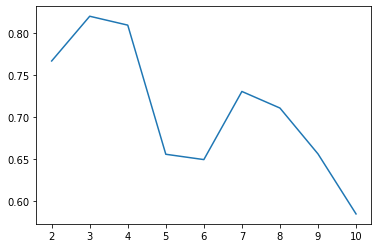

In [433]:
plt.plot(range(2, len(sil) + 2), sil)

In [434]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=2,
    max_iter=300,
    random_state=42
)

In [435]:
kmeans.fit(global_cost_list)

KMeans(init='random', n_clusters=3, n_init=2, random_state=42)

In [436]:
color_labels = kmeans.labels_

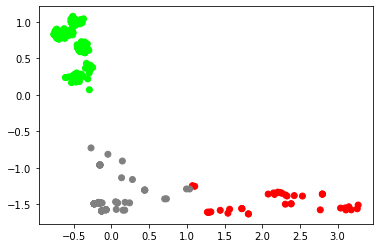

In [438]:
color = [(0.5,0.5,0.5),(1,0,0),(0,1,0),(0,0,1),(0,0,0)]
color_list = []
for ind in range(len(greenX)):
    color_list.append(color[color_labels[ind]])
    
plt.scatter(greenX, greenY,c=color_list)
#plt.show()

In [ ]:
# color = [(0.5,0.5,0.5),(1,0,0),(0,1,0),(0,0,1),(0,0,0)]
# color_list = []
# for ind in range(len(global_cost_list)):
#     color_list.append(color[color_labels[ind]])
    
# plt.scatter(global_time_normalized, global_risk_normalized,c=color_list)
# #plt.show()

# PageRank Implementation

In [440]:
idToRoad =  []
with open("../turning_network_linkID_updated.csv",'r') as f:
    idToRoad = csv.reader(f)
    idToRoad = list(idToRoad)
    
idToRoadDict = {}
roadToIdDict ={}
for element in idToRoad:
    idToRoadDict[element[0]] = (element[1],element[2])
    if "intersection" not in element[0]:
        roadToIdDict[element[1].split('_')[0],element[2].split('_')[0]] = element[0]
#
#print(roadToIdDict)    

In [248]:
# 8/3
global_trip_grouped = {}
for i in range(clusterNumber):
    global_trip_grouped[i] = []
    
for i in range(len(greenLoop)):
    key = "l" + str(greenLoop[i])
    global_trip_grouped[color_labels[i]].append(global_dict[key])


In [277]:
# global_trip_grouped = {}
# for i in range(clusterNumber):
#     global_trip_grouped[i] = []
    
# for i in range(1,globalNumber+1):
#     key = "l" + str(i)
#     global_trip_grouped[color_labels[i-1]].append(global_dict[key])

In [441]:
def pageRank(trips, origin = '1666494', destination = '1662728'): # input a bunch of trips, return a recommendation for route
    dualArcs = {} # store the arcs for dual graph
    originalG = nx.DiGraph()
    #print(len(trips))
    for t in trips:
        subG = nx.DiGraph()
        arcList = []
        for road in t:
            startNode = idToRoadDict[str(road)][0].split('_')[0]
            endNode = idToRoadDict[str(road)][1].split('_')[0]
            arcList.append((startNode,endNode))
        subG.add_edges_from(arcList)
        
        # find the path to be added to construct dual graph
        path = nx.shortest_path(subG, origin, destination)
        
        for ind in range(len(path)-2):
            #print((path[ind],path[ind + 1]))
            originalG.add_edges_from([(path[ind],path[ind + 1])])
            current_arc = path[ind]+'_to_'+path[ind + 1]
            next_arc = path[ind + 1]+'_to_'+path[ind + 2]
            if ind == 0:
                if not (path[0] in dualArcs):
                    dualArcs[path[0]] = {current_arc : 1}
                else:
                    if not(current_arc in dualArcs[path[0]]):
                        dualArcs[path[0]][current_arc] = 1
                    else:
                        dualArcs[path[0]][current_arc] += 1
            
            if not (current_arc in dualArcs):
                dualArcs[current_arc] = {next_arc : 1}
            else:
                if not (next_arc in dualArcs[current_arc]):
                    dualArcs[current_arc][next_arc] = 1
                else:
                    dualArcs[current_arc][next_arc] += 1

        last_arc = path[-2]+'_to_'+path[-1]
        originalG.add_edges_from([(path[-2],path[-1])])
        if not (last_arc in dualArcs):
                dualArcs[last_arc] = {path[-1] : 1}
        else:
            if not (path[-1] in dualArcs[last_arc]):
                dualArcs[last_arc][path[-1]] = 1
            else:
                dualArcs[last_arc][path[-1]] += 1
                
    for key in dualArcs:
        sumCount = 0
        for key2 in dualArcs[key]:
            sumCount += dualArcs[key][key2]
            
        for key2 in dualArcs[key]:
            dualArcs[key][key2] /= sumCount
        
    dualG = nx.DiGraph()
    
    dualArcList = []
    for key in dualArcs:
        for key2 in dualArcs[key]:
            dualArcList.append((key,key2,{'weight':dualArcs[key][key2]}))
            
    dualG.add_edges_from(dualArcList)
    dualG.add_edges_from([(destination,origin,{'weight':1})])
    #record pageRank result
    result = nx.pagerank(dualG, weight='weight', alpha=0.9)
    
    weightNode = {}
    for k in result:
        if '_to_' in k:
            startNode = k.split('_to_')[0]
            endNode = k.split('_to_')[1]
            #print(startNode,endNode)
            originalG[startNode][endNode]['weight'] = np.log(1/result[k])
            weightNode[(startNode,endNode)] = np.log(1/result[k])
    def returnWeight(start,end,weight):
        
        return weight['weight']
            
    optimalPath = nx.shortest_path(originalG,source=origin,target=destination,weight=returnWeight)
    #print(originalG['1666494'])
    return optimalPath
        
        
        

In [442]:
group_optimal_path = []
for g in range(clusterNumber):
    group_optimal_path.append(pageRank(global_trip_grouped[g]))

In [211]:
with open("group_5_optimal_path_L_filtered_2.pk", 'wb') as f:
    pickle.dump(group_optimal_path,f)

# construct the preference ratio distribution of the groups

In [ ]:
# ratioDict = {}
# for g in range(clusterNumber):
#     ratioDict[g] = []
    
# for idx in range(1,globmalNumber+1):
#     k = 'l' + str(idx)
#     ratioDict[kmeans.labels_[idx-1]].append(global_cost[k][0][0]/global_cost[k][0][1]) 
#     #ratioDict[kmeans.labels_[idx-1]].append(global_cost[k][0][1]/global_cost[k][0][0]) 
    

In [448]:
clusterNumber = 3
ratioDict = {}
for g in range(clusterNumber):
    ratioDict[g] = []
    
for idx in range(len(greenLoop)):
    k = 'l' + str(greenLoop[idx])
    ratioDict[kmeans.labels_[idx]].append(global_cost[k][0][0]/global_cost[k][0][1]) 
    #ratioDict[kmeans.labels_[idx-1]].append(global_cost[k][0][1]/global_cost[k][0][0])



In [449]:
normalDistribution = {}

for g in range(clusterNumber):
    normalDistribution[g] =  {'mean': np.mean(ratioDict[g]) , 'std':np.std(ratioDict[g]) }

In [450]:
normalDistribution

{0: {'mean': 0.5330672416066063, 'std': 0.15467738788153143},
 1: {'mean': 0.836774487228063, 'std': 0.24961409029185286},
 2: {'mean': 0.06931628875181668, 'std': 0.0081521765104537}}

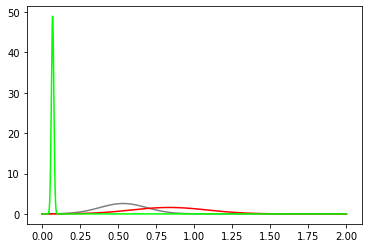

In [452]:
x_axis = np.arange(0, 2, 0.0001)

for g in range(clusterNumber):
    plt.plot(x_axis, stats.norm.pdf(x_axis, normalDistribution[g]['mean'], normalDistribution[g]['std']),c=color[g])
plt.show()

# construct the preference ratio distribution for the user

In [453]:
ratioLocal = []
    
for idx in range(1,51):
    k = 'l'+str(idx)
    ratioLocal.append(local_cost[k][0][0]/local_cost[k][0][1])

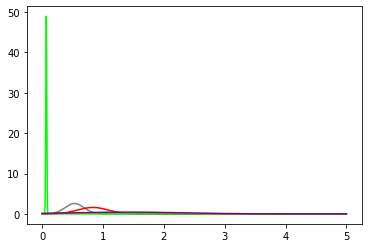

In [454]:
x_axis = np.arange(0, 5, 0.0001)

for g in range(clusterNumber):
    plt.plot(x_axis, stats.norm.pdf(x_axis, normalDistribution[g]['mean'], normalDistribution[g]['std']),c=color[g])

plt.plot(x_axis, stats.norm.pdf(x_axis,np.mean(ratioLocal),np.std(ratioLocal)),c='purple')
    
plt.show()

# Calculate KL-divergence

In [455]:
def KLDivergence(mean1,std1,mean2,std2):
    
    return np.log(std2/std1) + (std1**2 + (mean1-mean2)**2)/(2*std2**2) - 1/2

In [456]:
for g in range(clusterNumber):
    print('KL(group{},user) : {}'.format(g, KLDivergence(np.mean(ratioLocal),
                                                         np.std(ratioLocal), 
                                                         normalDistribution[g]['mean'], 
                                                         normalDistribution[g]['std'])
                                        ))
    

KL(group0,user) : 30.818689967696262
KL(group1,user) : 7.376836016143761
KL(group2,user) : 19652.94096903128
